THIẾT LẬP MÔI TRƯỜNG

In [33]:
import re
import numpy as np
import pandas as pd
import xgboost as xg
import tensorflow as tf
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz
from scipy.sparse import csr_matrix

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [35]:
from keras import optimizers 
from keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, GRU, Dropout, Bidirectional,Embedding

In [36]:
from sklearn import svm
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures#
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression # linear reg
from sklearn.linear_model  import LogisticRegression #lgr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor#

from sklearn.ensemble import RandomForestRegressor# Random forest tree
from sklearn.ensemble import GradientBoostingRegressor#

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as sklearn_train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeRegressor#DECISION TREE
from sklearn.neighbors import NearestNeighbors


In [37]:
df = pd.read_excel("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/diem_Thu.xlsx")#, encoding='ISO-8859-1')
# Xóa khoảng trắng ở trước tên cột
df = df.rename(columns=lambda x: x.strip())

In [38]:
df.info()  # Kiểm tra kiểu dữ liệu, số lượng giá trị null
df.describe()  # Các thống kê như min, max, mean
df.head()  # Xem dữ liệu mẫu
print(f"Dữ liệu có {df.shape[0]} dòng và {df.shape[1]} cột.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674273 entries, 0 to 674272
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mssv       674273 non-null  object 
 1   mamh       674273 non-null  object 
 2   malop      674258 non-null  object 
 3   sotc       674273 non-null  int64  
 4   hocky      674273 non-null  int64  
 5   namhoc     674273 non-null  int64  
 6   diem_qt    297601 non-null  float64
 7   diem_th    238559 non-null  float64
 8   diem_gk    303975 non-null  float64
 9   diem_ck    513427 non-null  float64
 10  diem_hp    673659 non-null  float64
 11  trangthai  674273 non-null  int64  
 12  tinhtrang  674273 non-null  int64  
 13  mamh_tt    2741 non-null    object 
dtypes: float64(5), int64(5), object(4)
memory usage: 72.0+ MB
Dữ liệu có 674273 dòng và 14 cột.


In [39]:
print(df.isnull().sum())
print(df.isnull().mean())  # Tính % giá trị thiếu

mssv              0
mamh              0
malop            15
sotc              0
hocky             0
namhoc            0
diem_qt      376672
diem_th      435714
diem_gk      370298
diem_ck      160846
diem_hp         614
trangthai         0
tinhtrang         0
mamh_tt      671532
dtype: int64
mssv         0.000000
mamh         0.000000
malop        0.000022
sotc         0.000000
hocky        0.000000
namhoc       0.000000
diem_qt      0.558634
diem_th      0.646198
diem_gk      0.549181
diem_ck      0.238547
diem_hp      0.000911
trangthai    0.000000
tinhtrang    0.000000
mamh_tt      0.995935
dtype: float64


In [40]:
df[df['mamh'].str.startswith('AI')]

,mssv,mamh,malop,sotc,hocky,namhoc,diem_qt,diem_th,diem_gk,diem_ck,diem_hp,trangthai,tinhtrang,mamh_tt
671998,CC9BE040XPvAibaEXe9TiGIvRgTlWzqkMHy5rwCo,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.5,9.0,1,0,NaN
671999,7DD53941XPvAibaEXe8LPxrujEz9HjRbj4CaPSqm,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.5,9.0,1,0,NaN
672000,14029FF2XPvAibaEXe+4UdF7idt72DMyRbJ/nBmz,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.0,8.6,1,0,NaN
672001,AC5771AEXPvAibaEXe+81QPULVxrILmZ9a7/udk8,AI001,AI001.N11,1,1,2022,6.0,NaN,NaN,9.5,8.5,1,0,NaN
672002,526AD05EXPvAibaEXe+UswxXBNJT7Mm0az0QUBAa,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.0,9.3,1,0,NaN
672003,9C7AC051XPvAibaEXe8G8K07ebOXR6Iv6alxNwSG,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.5,9.7,1,0,NaN
672004,CE33C597XPvAibaEXe9xdgWKUYIYQ6vRrnPQ+NJn,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.5,9.7,1,0,NaN
672005,A0AE5900XPvAibaEXe9xdgWKUYIYQwYUkYMnOj5k,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,5.5,6.9,1,0,NaN
672006,D5E4682AXPvAibaEXe9szjaFDisFuyvs7gz8fSmN,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.0,9.3,1,0,NaN
672007,06A3BFA1XPvAibaEXe+8+5uQAPsgDRbGbfPDmTJa,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,10.0,10.0,1,0,NaN


In [41]:
print(df[df['mamh'] == 'CS1113'].index)

Index([130068, 130069, 130070, 130071, 130072, 130073, 130074, 130075, 130076,
       130077,
       ...
       673606, 673607, 673608, 673609, 673610, 673611, 673612, 673613, 673614,
       673615],
      dtype='int64', length=457)


In [42]:
#drop các cột dữ liệu chứa trạng thái 4 5 ,điểm hp sẽ bằng 0 ,không phù hợp với bài toán
indexdr = df[ (df['trangthai'] ==4) | (df['trangthai'] ==5) | (df['trangthai'] ==0)].index
df.drop(indexdr , inplace=True)

In [43]:
#drop các cột dữ liệu chứa học kỳ 3 , không phù hợp với bài toán
indexdr = df[ df['hocky'] ==3].index
df.drop(indexdr , inplace=True)

In [44]:
df.shape

(632972, 14)

In [45]:
df=df[['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai']] # trích xuất thuộc tính

In [46]:
#số dữ liệu rỗng (NaN) có trong mỗi cột
df.isnull().sum()

mssv           0
mamh           0
sotc           0
hocky          0
namhoc         0
diem_hp      491
trangthai      0
dtype: int64

In [47]:
df.columns

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai'], dtype='object')

In [48]:
df = df.dropna(axis=0, subset=['diem_hp'])

In [49]:
# kiểm tra lại số dữ liệu rỗng
df.isnull().sum()

mssv         0
mamh         0
sotc         0
hocky        0
namhoc       0
diem_hp      0
trangthai    0
dtype: int64

In [50]:
df=df.reset_index(drop=True)

In [51]:
#tính điểm trung bình điểm hp dưa trên 'mamh','namhoc','hocky'
df['meanmh'] = df.groupby(['mamh','namhoc','hocky'], sort=False)['diem_hp'].transform('mean')

In [52]:
#Tính tổng số tín chỉ mà sinh viên học trong 1 kì -năm đó
df['sotchocky'] = df.groupby(['mssv','namhoc','hocky'], sort=False)['sotc'].transform('sum')

In [53]:
#Tính điểm trung bình môn mà sinh viên đạt đươc trông 1 kì năm đó
df['diemtbhocky'] = df.groupby(['mssv','namhoc','hocky'], sort=False)['sotc'].transform('sum')

In [54]:
df

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,meanmh,sotchocky,diemtbhocky
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,5.201887,20,20
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,5.716981,20,20
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,5.749032,20,20
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,5.730660,20,20
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,6.195755,20,20
...,...,...,...,...,...,...,...,...,...,...
632476,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,7.559184,12,12
632477,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,7.559184,12,12
632478,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,7.559184,12,12
632479,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,7.559184,12,12


In [55]:
for i in range(0,632481,1):
  df.iat[i,9]=(df.iat[i,5]*df.iat[i,2])/df.iat[i,9]
df['diemtbhocky'] = df.groupby(['mssv','namhoc','hocky'], sort=False)['diemtbhocky'].transform('sum')

D:\TEMP\ipykernel_25692\1610262170.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[i,9]=(df.iat[i,5]*df.iat[i,2])/df.iat[i,9]
D:\TEMP\ipykernel_25692\1610262170.py:2: RuntimeWarning: invalid value encountered in scalar divide
  df.iat[i,9]=(df.iat[i,5]*df.iat[i,2])/df.iat[i,9]


In [56]:
df

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,meanmh,sotchocky,diemtbhocky
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,5.201887,20,5.825000
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,5.716981,20,5.825000
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,5.749032,20,5.825000
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,5.730660,20,5.825000
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,6.195755,20,5.825000
...,...,...,...,...,...,...,...,...,...,...
632476,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,7.559184,12,5.725000
632477,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,7.559184,12,8.450000
632478,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,7.559184,12,8.466667
632479,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,7.559184,12,8.100000


In [57]:
# Đọc file đầu vào 01.sinhvien.xlsx
sv = pd.read_excel("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/01.sinhvien.xlsx")

In [58]:
sv=sv[['mssv',' khoa',' gioitinh', ' hedt',' khoahoc',' tinhtrang']] #Chọn lọc thuộc tính

In [59]:
# merge 2 bảng là df tệp của diem_Thu và sv là của tệp sinh_vien
merged=df.merge(sv,on="mssv",how="left")

In [60]:
# dùng để kiểm tra trong bảng có giá trị null không nếu có thì fill vào
merged.isnull().sum()

mssv                0
mamh                0
sotc                0
hocky               0
namhoc              0
diem_hp             0
trangthai           0
meanmh              0
sotchocky           0
diemtbhocky         0
 khoa          289342
 gioitinh      289342
 hedt          289342
 khoahoc       289342
 tinhtrang     289342
dtype: int64

In [61]:
merged[" khoa"].fillna("NoInfo", inplace = True) #fill - làm sạch nan cho 4 đang thiếu dữ liệu
merged[" gioitinh"].fillna(2,inplace=True)
merged[" tinhtrang"].fillna(10, inplace = True)  
merged[" hedt"].fillna("NoInfo", inplace = True) 

In [62]:
merged
merged.isnull().sum()

mssv                0
mamh                0
sotc                0
hocky               0
namhoc              0
diem_hp             0
trangthai           0
meanmh              0
sotchocky           0
diemtbhocky         0
 khoa               0
 gioitinh           0
 hedt               0
 khoahoc       289342
 tinhtrang          0
dtype: int64

In [63]:
#Tính lại khoahoc của cac sinh vien ,co hon nua sinh vien thieu dư liệu khoahoc bơi vi bang diemthu có gấp đôi sinh vien bảng sinhvien nên có rất nhiều sinh viên thiếu cột khóa học ,thiếu từ khóa học 7 về trước
merged['khoa_hoc'] = merged.groupby(['mssv'],sort=False)['namhoc'].transform('min') 
for i in range(0,632481,1):
  merged.iat[i,15]=merged.iat[i,15]-2006+1

In [64]:
merged.drop(' khoahoc', inplace=True, axis=1) #drop ' khoahoc' cot khoa_hoc chính là cột khóa học mới được thay thế

In [65]:
merged['so_hocky'] = (merged['namhoc']-(merged['khoa_hoc']+2005))*2  +merged['hocky']

In [66]:
indexdr = merged[merged['so_hocky'] >=17].index #drop sinh viên học nhiều hơn 16 kì
merged.drop(indexdr , inplace=True)

In [68]:
merged['so_hocky'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [69]:
merged=merged.reset_index(drop=True)

In [70]:
merged

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,meanmh,sotchocky,diemtbhocky,khoa,gioitinh,hedt,tinhtrang,khoa_hoc,so_hocky
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,5.201887,20,5.825000,NoInfo,2.0,NoInfo,10.0,1,1
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,5.716981,20,5.825000,NoInfo,2.0,NoInfo,10.0,1,1
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,5.749032,20,5.825000,NoInfo,2.0,NoInfo,10.0,1,1
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,5.730660,20,5.825000,NoInfo,2.0,NoInfo,10.0,1,1
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,6.195755,20,5.825000,NoInfo,2.0,NoInfo,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,7.559184,12,5.725000,NoInfo,2.0,NoInfo,10.0,17,1
632350,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,7.559184,12,8.450000,NoInfo,2.0,NoInfo,10.0,17,1
632351,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,7.559184,12,8.466667,NoInfo,2.0,NoInfo,10.0,17,1
632352,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,7.559184,12,8.100000,NoInfo,2.0,NoInfo,10.0,17,1


In [84]:
#merged.to_csv("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/Machine Learning/last_data.csv")

In [157]:
last=pd.read_csv("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/Machine Learning/last_data.csv")#Đọc file đã qua tiền xử lí
last.drop(last.iloc[:, 0:1], inplace=True, axis=1)#drop cột số thứ tự đầu tiên vì không có công dụng
last.columns

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai',
       'meanmh', 'sotchocky', 'diemtbhocky', ' khoa', ' gioitinh', ' hedt',
       ' tinhtrang', 'khoa_hoc', 'so_hocky'],
      dtype='object')

In [158]:
merged=last.copy()

In [159]:
merged['mssv'].unique().shape # số mã sinh viên khác nhau

(17870,)

In [160]:
dt=merged.pivot_table(index=['mssv','mamh','namhoc','hocky'],columns='so_hocky',values='diemtbhocky',fill_value=0)

In [161]:
dt.add_prefix('dtbsv_hocky_')

so_hocky                                                     dtbsv_hocky_1  \
mssv                                     mamh  namhoc hocky                  
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1           7.794118   
                                         IT002 2021   2           0.000000   
                                         IT003 2021   2           0.000000   
                                         IT004 2022   1           0.000000   
                                         IT005 2022   1           0.000000   
...                                                                    ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1           6.100000   
                                         PHY22 2006   2           0.000000   
                                         SOCI1 2008   2           0.000000   
                                         VCPL1 2007   2           0.000000   
                                         WINP1 2007   1           0.000000   

so_hocky                                                     dtbsv_hocky_2  \
mssv                                     mamh  namhoc hocky                  
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1           0.000000   
                                         IT002 2021   2           8.280952   
                                         IT003 2021   2           8.280952   
                                         IT004 2022   1           0.000000   
                                         IT005 2022   1           0.000000   
...                                                                    ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1           0.000000   
                                         PHY22 2006   2           4.857143   
                                         SOCI1 2008   2           0.000000   
                                         VCPL1 2007   2           0.000000   
                                         WINP1 2007   1           0.000000   

so_hocky                                                     dtbsv_hocky_3  \
mssv                                     mamh  namhoc hocky                  
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1            0.00000   
                                         IT002 2021   2            0.00000   
                                         IT003 2021   2            0.00000   
                                         IT004 2022   1            7.55625   
                                         IT005 2022   1            7.55625   
...                                                                    ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1            0.00000   
                                         PHY22 2006   2            0.00000   
                                         SOCI1 2008   2            0.00000   
                                         VCPL1 2007   2            0.00000   
                                         WINP1 2007   1            5.46000   

so_hocky                                                     dtbsv_hocky_4  \
mssv                                     mamh  namhoc hocky                  
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1                0.0   
                                         IT002 2021   2                0.0   
                                         IT003 2021   2                0.0   
                                         IT004 2022   1                0.0   
                                         IT005 2022   1                0.0   
...                                                                    ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1                0.0   
                                         PHY22 2006   2                0.0   
                                         SOCI1 2008   2                0.0   
                                         VCPL1 2007   2                0.0   
                   

In [162]:
dt.columns.name=None
dt=dt.reset_index()

In [163]:
dt

,mssv,mamh,namhoc,hocky,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT001,2021,1,7.794118,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT002,2021,2,0.000000,8.280952,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT003,2021,2,0.000000,8.280952,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT004,2022,1,0.000000,0.000000,7.55625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT005,2022,1,0.000000,0.000000,7.55625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632301,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,PHY01,2006,1,6.100000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632302,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,PHY22,2006,2,0.000000,4.857143,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632303,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,SOCI1,2008,2,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632304,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,VCPL1,2007,2,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
rss=merged.merge(dt,on=["mssv",'mamh','namhoc','hocky'],how="left")

In [165]:
rss.columns

Index([       'mssv',        'mamh',        'sotc',       'hocky',
            'namhoc',     'diem_hp',   'trangthai',      'meanmh',
         'sotchocky', 'diemtbhocky',       ' khoa',   ' gioitinh',
             ' hedt',  ' tinhtrang',    'khoa_hoc',    'so_hocky',
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16],
      dtype='object')

In [166]:
import pandas as pd
import numpy as np
import time

# Giả sử DataFrame rss đã tồn tại

start_time = time.time()  # Bắt đầu đo thời gian

# Nhóm dữ liệu theo 'mssv'
grouped = rss.groupby('mssv')

# Hàm xử lý từng nhóm
def process_group(group):
    max_ki = group['so_hocky'].max()
    
    # Kiểm tra nếu 'max_ki' là NaN hoặc không hợp lệ
    if pd.isna(max_ki):
        return group

    for ii in range(1, int(max_ki) + 1):
        # Kiểm tra cột 'ii' có tồn tại không
        if ii not in group.columns:
            continue

        # Lọc giá trị lớn hơn 0 trong cột 'ii' và chuyển sang Numpy array để xử lý nhanh hơn
        valid_values = group[group[ii] > 0][ii].to_numpy()

        if valid_values.size == 0:
            break
        else:
            # Gán giá trị đầu tiên tìm được cho các hàng có 'ki_thu' lớn hơn 'ii'
            group.loc[group['so_hocky'] > ii, ii] = valid_values[0]

        # Đặt giá trị của cột 'ii' thành 0 cho các hàng có 'ki_thu' bằng 'ii'
        group.loc[group['so_hocky'] == ii, ii] = 0

    return group

# Áp dụng hàm `process_group` cho từng nhóm 'mssv'
rss = grouped.apply(process_group)

end_time = time.time()  # Kết thúc đo thời gian

print(f"Hoàn thành xử lý trong {end_time - start_time:.2f} giây.")


Hoàn thành xử lý trong 63.94 giây.


In [167]:
rss.columns

Index([       'mssv',        'mamh',        'sotc',       'hocky',
            'namhoc',     'diem_hp',   'trangthai',      'meanmh',
         'sotchocky', 'diemtbhocky',       ' khoa',   ' gioitinh',
             ' hedt',  ' tinhtrang',    'khoa_hoc',    'so_hocky',
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16],
      dtype='object')

In [168]:
rss=rss.drop(['diemtbhocky','meanmh',' tinhtrang'],axis=1)

In [169]:
rss_reset = rss.reset_index(drop=True)

In [170]:
rss_reset

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,sotchocky,khoa,gioitinh,...,7,8,9,10,11,12,13,14,15,16
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT001,4,1,2021,8.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,PH001,3,1,2021,7.2,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA006,4,1,2021,7.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NT005,1,1,2021,8.5,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA003,3,1,2021,7.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS014,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632350,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS019,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632351,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS321,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632352,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,IS207,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#rss_reset.to_csv("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/Machine Learning/ML_DATA_TEST.csv")

tiền xử lý data

In [ ]:
ml_df=pd.read_csv("D:/school lecture/Mạng xã hội/SV - Tài liệu môn học/Bài tập cá nhân trên lớp/Tổng hợp source và data/Tổng hợp source/data/Machine Learning/ML_DATA_TEST.csv")#Đọc file đã qua tiền xử lí

In [175]:
ml_df.drop(ml_df.iloc[:, 0:1], inplace=True, axis=1)#drop cột chứa thông tin vô nghĩa

In [176]:
ml_df

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,sotchocky,khoa,gioitinh,...,7,8,9,10,11,12,13,14,15,16
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT001,4,1,2021,8.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,PH001,3,1,2021,7.2,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA006,4,1,2021,7.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NT005,1,1,2021,8.5,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA003,3,1,2021,7.6,1,17,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS014,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632350,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS019,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632351,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS321,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632352,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,IS207,4,1,2009,0.0,1,22,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# Sắp xếp dữ liệu theo 'namhoc' tăng dần, sau đó theo 'mssv'
ml_df = ml_df.sort_values(by=['namhoc', 'mssv'], ascending=[True, True])

# Reset lại chỉ số index sau khi sắp xếp (nếu cần)
ml_df = ml_df.reset_index(drop=True)

# Hiển thị DataFrame sau khi sắp xếp
ml_df

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,sotchocky,khoa,gioitinh,...,7,8,9,10,11,12,13,14,15,16
0,0144E5EFXPvAibaEXe9loVWo0aTuLH2jCqzKwSb7,CARC1,3,1,2006,5.0,1,20,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0144E5EFXPvAibaEXe9loVWo0aTuLH2jCqzKwSb7,CSC21,5,1,2006,5.0,1,20,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0144E5EFXPvAibaEXe9loVWo0aTuLH2jCqzKwSb7,ENG02,0,1,2006,5.5,1,20,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0144E5EFXPvAibaEXe9loVWo0aTuLH2jCqzKwSb7,MAT21,4,1,2006,3.5,2,20,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0144E5EFXPvAibaEXe9loVWo0aTuLH2jCqzKwSb7,PEDU1,0,1,2006,8.0,1,20,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,IT004,4,1,2022,7.0,1,19,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632350,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,IT005,4,1,2022,7.0,1,19,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632351,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,IT007,4,1,2022,7.6,1,19,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632352,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,CE121,4,1,2022,7.4,1,19,NoInfo,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
unique_counts = ml_df.nunique()
unique_counts

mssv         17870
mamh           635
sotc            11
hocky            2
namhoc          17
diem_hp        210
trangthai        3
sotchocky       47
 khoa            7
 gioitinh        3
 hedt            6
khoa_hoc        17
so_hocky        16
1             6202
2             7173
3             6703
4             6361
5             5703
6             5471
7             4856
8             3557
9             1791
10            1010
11             611
12             363
13             209
14             110
15              73
16              33
dtype: int64

In [188]:
label_encoder = LabelEncoder() #encode cột dữ liệu phân loại

ml_df['mssv'] = label_encoder.fit_transform(ml_df['mssv'])
ml_df = pd.get_dummies(ml_df, columns=[' khoa', ' hedt'], drop_first=True)
ml_df['mamh'] = label_encoder.fit_transform(ml_df['mamh'])

Validation MAE: 1.1320
Validation RMSE: 1.5803
Validation R²: 0.5552
Test MAE: 1.1434
Test RMSE: 1.6000
Test R²: 0.5548


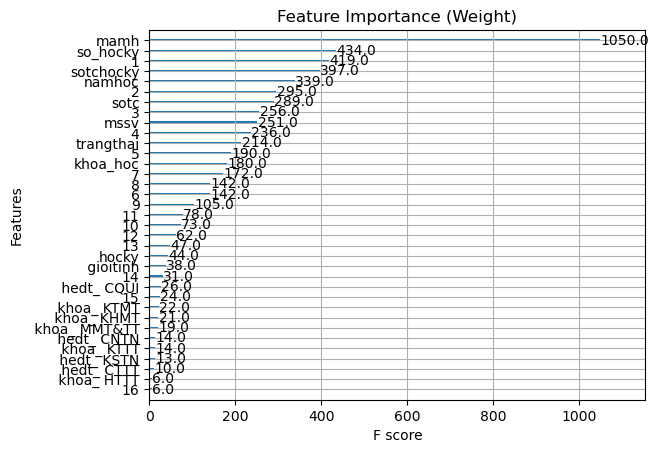

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 1. Lọc dữ liệu và tách các tập huấn luyện, kiểm tra, xác thực
train_data = ml_df.loc[
    (ml_df['namhoc'] < 2021) | ((ml_df['namhoc'] == 2021) & (ml_df['hocky'] == 1))
]

# Tách đặc trưng và mục tiêu
X = train_data.drop(['diem_hp'], axis=1)  # Đặc trưng
y = train_data['diem_hp']                 # Mục tiêu

# Chia dữ liệu thành tập huấn luyện, kiểm tra và xác thực
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 2. Khởi tạo và huấn luyện mô hình XGBoost
model = xgb.XGBRegressor(
    random_state=42,
    n_estimators=100,       # Số lượng cây
    max_depth=6,            # Độ sâu của cây
    learning_rate=0.1,      # Tốc độ học
    objective='reg:squarederror'  # Hàm mất mát hồi quy
)
model.fit(X_train, y_train)

# 3. Đánh giá trên tập xác thực
y_pred_validate = model.predict(X_validate)
validate_mae = mean_absolute_error(y_validate, y_pred_validate)
validate_rmse = np.sqrt(mean_squared_error(y_validate, y_pred_validate))
validate_r2 = r2_score(y_validate, y_pred_validate)

print(f"Validation MAE: {validate_mae:.4f}")
print(f"Validation RMSE: {validate_rmse:.4f}")
print(f"Validation R²: {validate_r2:.4f}")

# 4. Dự đoán và đánh giá trên tập kiểm tra
y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# 5. Hiển thị độ quan trọng của các đặc trưng
import matplotlib.pyplot as plt

xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.show()


In [194]:
# Hàm đánh giá hiệu năng mô hình
def evaluate_regression(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # Tính MAPE nhưng bỏ qua các giá trị y_true == 0
    non_zero_indices = y_true != 0
    if np.any(non_zero_indices):  # Chỉ tính nếu có giá trị khác 0
        mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    else:
        mape = None  # Trả về None nếu tất cả y_true đều bằng 0

    print(f"--- Evaluation on {dataset_name} ---")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%" if mape is not None else "MAPE : Not Defined (y_true contains zeros)")
    return mae, rmse, r2, mape
# Đánh giá trên tập validate
y_pred_validate = model.predict(X_validate)
evaluate_regression(y_validate, y_pred_validate, dataset_name="Validation Set")

# Đánh giá trên tập test
y_pred_test = model.predict(X_test)
evaluate_regression(y_test, y_pred_test, dataset_name="Test Set")


--- Evaluation on Validation Set ---
MAE  : 1.1320
RMSE : 1.5803
R²   : 0.5552
MAPE : 23.73%
--- Evaluation on Test Set ---
MAE  : 1.1434
RMSE : 1.6000
R²   : 0.5548
MAPE : 24.41%


(1.143394631583365, 1.6000168743411696, 0.5548403895603977, 24.413142817390014)